<h3>Imports

<h4> Bibliotecas e Ferramentas utilizadas: </h4>

- **Scikit-Learn**: Biblioteca responsável por fornecer funcionalidades para o treinamento de modelos (como Decision Tree e Random Forest), além de métodos para a divisão dos dados em conjuntos de treinamento e teste.
    - **Metrics**: Ainda da Biblioteca, foram utilizadas funcoes voltas para metricas:
        - confusion_matrix
        - roc_curve
        - precision_score
        - recall_score
        - f1_score
    
    - **Tecnicas de treinamento**: Outras ferramentas utilizadas para personalizar e agregar valor aos modelos incluem o cross_val_score, que é utilizado para avaliar o modelo, diversificando a massa de dados e retornando uma média das métricas. Essas métricas podem ser utilizadas como indicador da qualidade resultante dos parâmetros utilizados para o treinamento do modelo. Em conjunto com a função cost_complexity_pruning_path, que é utilizada para encontrar o melhor modelo de árvore de decisão, é possível realizar uma série de testes com o intuito de encontrar os parâmetros ótimos para o treinamento. Além disso, o RandomizedSearchCV é utilizado para realizar uma série de testes, compilando os melhores resultados alinhados aos parâmetros utilizados, principalmente com base nas ferramentas descritas anteriormente.

<br></br>
- **Pandas**: Oferece funções para o gerenciamento de dados, com uso principal na extração de datasets a partir de arquivos CSV, onde a massa de dados está armazenada.

- **Seaborn, Matplotlib, Numpy**: Fornecem funções para a representação dos dados matemáticos extraídos, conversão de dados para facilitar seu uso e geração de gráficos necessários para a análise dos resultados obtidos.



In [1]:
# Imports de modelos de classificadores
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Import de divisor de dados para classificadores
from sklearn.model_selection import train_test_split

# Import de biblioteca de gerenciamento de arquivos
import pandas as pd

# Import de bibliotecas matemáticas
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, make_scorer, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict, RandomizedSearchCV
import numpy as np


from skopt import BayesSearchCV
from skopt.space import Categorical, Integer, Real

# Import de biblioteca para ROC
from sklearn.preprocessing import label_binarize

import optuna


<h3>Função Metricas dos dados

In [2]:
# Realiza o calculo das metricas abaixo para cada coluna presente no Dataset
def calculationMetricas(df, colunm, df_result):
    # Calcular as métricas
    metrics = {
        'Count': df.count(),
        'Mean': df.mean(),
        'Std': df.std(),
        'Min': df.min(),
        '25%': df.quantile(0.25),
        '50%': df.median(),
        '75%': df.quantile(0.75),
        'Max': df.max()
    }

    df_result[colunm] = pd.Series(metrics)

# Executa o metodo para calcular, passando caminho dos dados de origem
def executeCalculationMetricas(path):
    data_wqi = pd.read_csv(path)
    metrics_df = pd.DataFrame()

    for colunm in data_wqi.columns:
        calculationMetricas(data_wqi[colunm], colunm, metrics_df)

    metrics_df.head()
    

<h3>Função Importação Data Frame

In [3]:
# # Função de Data Frames para execução dos algoritmos de machine learning
def importarDataFrame(tipo, autor):

    # Definição de caminho de arquivo para autores da execução
    if(autor == 'Hugo'):
        caminho = 'C:/Users/Hugo/'
    elif(autor == 'Arthur'):
        caminho = '/Users/arthurhenrique/Documentos/pessoal/faculdade/documentos/tcc/repository/'

    # Verificação de tipo de banco de dados a ser utilizado
    if(tipo == 'normal'):
        # Data Frame de Base apenas balanceada
        df = pd.read_csv(f'{caminho}machine-learning-water-quality/notebook/output/amostra_por_classificador.csv')

    elif(tipo == 'adasyn'):
        # Data Frame com oversampling ADASYN
        df = pd.read_csv(f'{caminho}machine-learning-water-quality/notebook/output/adasyn.csv')

    elif(tipo == 'smote'):
        # Data Frame com oversampling SMOTE
        df = pd.read_csv(f'{caminho}machine-learning-water-quality/notebook/output/smote.csv')
    else:
        print('null')
        return

    # Retorno do Data Frame a ser utilizado
    return df

<h3>Função de divisão dos dados

In [4]:
def dividirDados(dataFrame):
    
    # A variável X determina o conjunto de atributos sem o rótulo
    X = dataFrame.drop('WQI', axis=1)

    # O Y são os rótulos contendo a classificação do WQI
    y = dataFrame['WQI']

    # Retorno da divisão de dados teste e treinamento e suas proporções
    return X, y

<h3>Função para treinamento e teste do modelo

In [5]:
# # Função para treinamento, teste e escolha de modelos de machine learnin

def criarModelo(tipo, cenario, params={}):
    
    # Verificação do tipo do modelo   
    if(tipo == 'Decision Tree'):

        if cenario == 1:
            # sem validacao cruzada e hiperparametrizacao
            model = DecisionTreeClassifier(random_state=42)
            
        elif cenario == 2:
            # com validacao cruzada e sem hiperparametrizacao
            model = DecisionTreeClassifier(random_state=42)
            
        elif cenario == 3:
            model =  DecisionTreeClassifier(**params, random_state=42)
            
        else:
            print('null')
            return
        
        
    elif(tipo == 'Random Forest'):
        
        if cenario == 1:
            # sem validacao cruzada e hiperparametrizacao
            model = RandomForestClassifier(random_state=42)
            
        elif cenario == 2:
            # com validacao cruzada e sem hiperparametrizacao
            model = RandomForestClassifier(random_state=42)
            
        elif cenario == 3:
            model =  RandomForestClassifier(**params, random_state=42)
            
        else:
            print('null')
            return

    else:
        
        print('null')
        return
    
    # Retorno do modelo
    return model

<h3>Função para visualização de relatórios

In [ ]:
# # Função de configuração das obtenções de métricas de desempenho e visualização
from sklearn.model_selection import StratifiedKFold


def visualizarRelatorios(model, X, y, tipo, cross):
    cv_strategy_search = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    if cross:
        cross_val_predict(model, X_train, y_train, cv=cv_strategy_search)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test) 
        
    else:
        model.fit(X_train, y_train) 
        y_pred = model.predict(X_test) 
        
    precisao = precision_score(y_test, y_pred, average=None)
    recall = recall_score(y_test, y_pred, average=None)
    f1 = f1_score(y_test, y_pred, average=None)
    accuracy = accuracy_score(y_test, y_pred)

    precisaoMedia = precision_score(y_test, y_pred, average='macro')
    recallMedio = recall_score(y_test, y_pred, average='macro')
    f1Medio = f1_score(y_test, y_pred, average='macro')

    print("Precisão: ", precisao)
    print("Precisão Média: ", precisaoMedia)
    print("Recall: ", recall)
    print("Recall Médio: ", recallMedio)
    print("F1: ", f1)
    print("F1 Médio: ", f1Medio)
    print("Accuracy: ", accuracy)


    # Importância dos atributos para resultados obtidos
    feature_importances = model.feature_importances_
    sns.barplot(x=feature_importances, y=X.columns)
    plt.title("Feature Importance")
    plt.show()
    
    # Visualização Matriz de Confusão
    confusionMatrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix)
    disp.plot(cmap=plt.cm.Blues)
    plt.show()

    # Visualização ROC
    y_bin = label_binarize(y_test, classes=[1, 2, 3, 4])
    n_classes = y_bin.shape[1]

    y_prob = model.predict_proba(X_test)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    plt.figure(figsize=(8, 6))
    for i in range(n_classes):
         plt.plot(fpr[i], tpr[i], label=f'Classe {i + 1}(AUC = {roc_auc[i]:.4f})')

    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Falsos Positivos (FPR)')
    plt.ylabel('Verdadeiros Positivos (TPR)')
    plt.title('Curva ROC Multiclasse (Validação Cruzada)')
    plt.legend(loc="lower right")
    plt.show()

<h3>Função de execução e relatório

In [7]:
# # Função de integração geral de funções prévias e relatórios respectivos
def machineLearning(tipoDataFrame, tipoModelo, autor, cenario, cross):

    # Chamada de funções para importação e divisão do data frame
    X, y = dividirDados(importarDataFrame(tipoDataFrame, autor))

    params = {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'log_loss', 'max_depth': 19, 'max_features': 'log2', 'max_leaf_nodes': 366, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'warm_start': False}    
    
    # Chamada de função de treinamento e teste
    model = criarModelo(tipoModelo, cenario, params)
    
    print(model.get_params)

    # Chamada de função com relatórios relacionados
    visualizarRelatorios(model, X, y, tipoModelo, cross)

<h2>Execução

In [8]:
executeCalculationMetricas('/Users/arthurhenrique/Documentos/pessoal/faculdade/documentos/tcc/repository/machine-learning-water-quality/notebook/base_consolidada/arquivo_amazonia_metricas_wqi.csv')

machineLearning('normal', 'Decision Tree', 'Arthur', 3, False)

# optuna - Decision tree
# Precisão:  [0.86206897 0.71111111 0.77325581 0.85164835]
# Precisão Média:  0.7995210605575481
# Recall:  [0.84745763 0.72316384 0.75141243 0.87570621]
# Recall Médio:  0.7994350282485876
# F1:  [0.85470085 0.71708683 0.76217765 0.86350975]
# F1 Médio:  0.7993687722920422
# Accuracy:  0.7994350282485876

# BayesSearchCV
# Precisão:  [0.89944134 0.78034682 0.7877095  0.89265537]
# Precisão Média:  0.8400382565074285
# Recall:  [0.90960452 0.76271186 0.79661017 0.89265537]
# Recall Médio:  0.8403954802259886
# F1:  [0.90449438 0.77142857 0.79213483 0.89265537]
# F1 Médio:  0.840178288035839
# Accuracy:  0.8403954802259888

# random_search - bayer
# Precisão:  [0.90957447 0.91616766 0.89010989 0.95906433]
# Precisão Média:  0.9187290875877587
# Recall:  [0.96610169 0.86440678 0.91525424 0.92655367]
# Recall Médio:  0.9180790960451977
# F1:  [0.9369863  0.88953488 0.90250696 0.94252874]
# F1 Médio:  0.9178892211278196
# Accuracy:  0.9180790960451978

# - optuna
# Precisão:  [0.90860215 0.88690476 0.86956522 0.95882353]
# Precisão Média:  0.9059739148113664
# Recall:  [0.95480226 0.84180791 0.9039548  0.92090395]
# Recall Médio:  0.9053672316384181
# F1:  [0.93112948 0.86376812 0.88642659 0.93948127]
# F1 Médio:  0.9052013633338406
# Accuracy:  0.905367231638418

TypeError: DecisionTreeClassifier.__init__() got an unexpected keyword argument 'bootstrap'

<h3> Tunagem utilizando o bayerSeachCV - cenario 3</h3>

Precisão:  [0.65217391 1.         0.64285714 0.93333333]
Precisão Média:  0.8070910973084886
Recall:  [0.88235294 0.26315789 0.94736842 0.875     ]
Recall Médio:  0.741969814241486
F1:  [0.75       0.41666667 0.76595745 0.90322581]
F1 Médio:  0.7089624799816976
Accuracy:  0.7323943661971831
Melhores Parâmetros Encontrados:
OrderedDict({'ccp_alpha': 0.0032495839534294538, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 21, 'max_features': 0.2, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.007558005328358815, 'min_samples_leaf': 14, 'min_samples_split': 29, 'min_weight_fraction_leaf': 0.019339763210884188, 'splitter': 'best'})
Melhor Score de Validação Cruzada:
0.7079724409448819


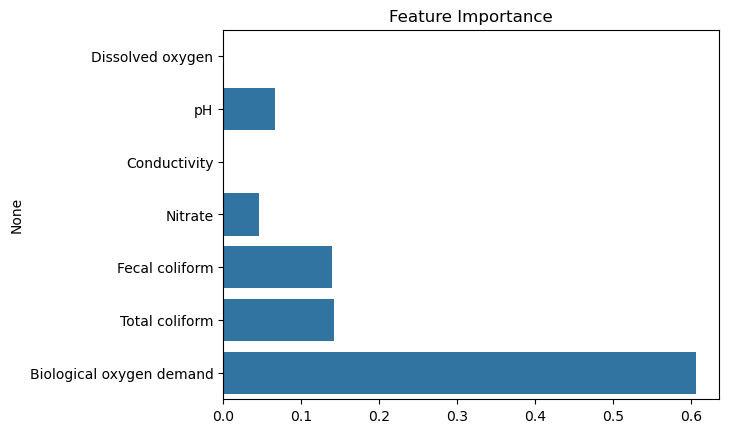

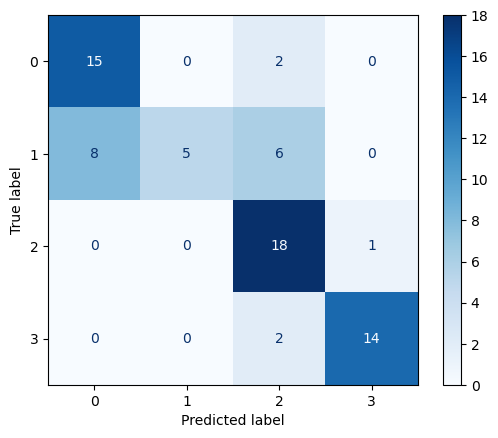

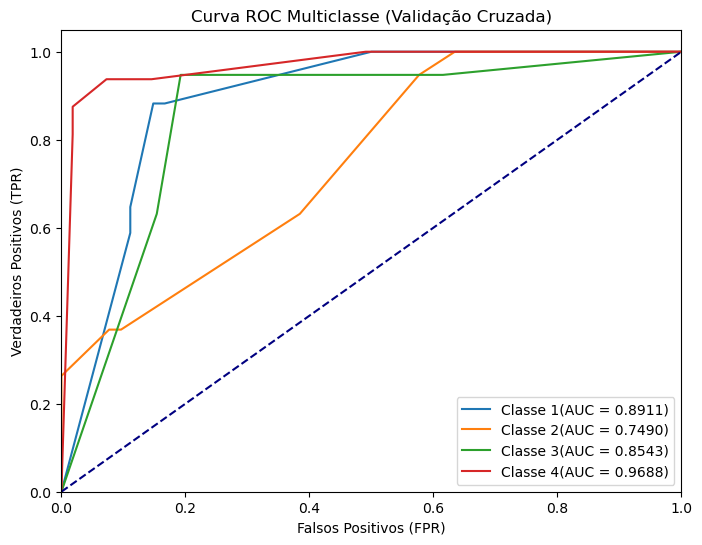

In [ ]:

# # Random Forest
from sklearn.model_selection import StratifiedKFold


# param_dist = {
#      'criterion': Categorical(['gini', 'entropy', 'log_loss']),
#      'max_depth': Integer(50, 100),  # Profundidade máxima da árvore
#      'min_samples_split': Integer(2, 32),  # Número mínimo de amostras para dividir um nó
#      'min_samples_leaf': Integer(1, 16),  # Número mínimo de amostras por folha
#      'min_weight_fraction_leaf': Real(0, 0.05),
#      'max_features': Categorical(['sqrt', 'log2', 0.1, 0.2, 0.3, 0.4, 0.5]),  # Número máximo de features
#      'max_leaf_nodes': Integer(10, 1000),
#      'bootstrap': Categorical([True, False]),
#      'min_impurity_decrease': Real(0, 0.01),
#      'warm_start': Categorical([True, False]),
#      'ccp_alpha': Real(0, 0.004)  # Se deve usar amostragem com reposição (bootstrap)
# }

# v2 random Forest
# param_dist = {
#     'criterion': Categorical(['gini', 'entropy']),  # Removi log_loss pois é mais usado para classificação multiclasse
    
#     'max_depth': Integer(5, 100),  # Aumentei o intervalo para permitir árvores mais profundas
    
#     'min_samples_split': Integer(2, 20),  # Reduzi o limite superior pois valores muito altos podem causar underfitting
    
#     'min_samples_leaf': Integer(1, 10),  # Reduzi o limite superior para permitir maior granularidade
    
#     'min_weight_fraction_leaf': Real(0, 0.01),  # Reduzi para permitir folhas menores
    
#     'max_features': Categorical(['sqrt', 'log2', 0.3, 0.5, 0.7, 0.9]),  # Adicionei mais opções de proporções
    
#     'max_leaf_nodes': Integer(20, 500),  # Ajustei para um intervalo mais razoável
    
#     'bootstrap': Categorical([True, False]),  # Mantive igual pois são as únicas opções possíveis
    
#     'min_impurity_decrease': Real(0, 0.005),  # Ajustei para permitir divisões com menos ganho de impureza
    
#     'n_estimators': Integer(100, 500),  # NOVO: Número de árvores na floresta
    
#     'ccp_alpha': Real(0, 0.01)  # Aumentei um pouco para permitir mais poda
# }


# Decision Tree
param_dist = {
     'criterion': Categorical(['gini', 'entropy', 'log_loss']), 
     'splitter': Categorical(['best', 'random']),                
     'max_depth': Integer(5, 25),                            
     'min_samples_split': Integer(2, 32),       
     'min_samples_leaf': Integer(1, 16),          
     'min_weight_fraction_leaf': Real(0, 0.05),  
     'max_features': Categorical(['sqrt', 'log2', 0.1, 0.2, 0.3, 0.4, 0.5]),  
     'max_leaf_nodes': Categorical([None, 10, 20, 50, 100, 200, 500, 1000]),   
     'min_impurity_decrease': Real(0, 0.01),                   
     'class_weight': Categorical([None, 'balanced']), 
     'ccp_alpha': Real(0, 0.004)              
}

# Configurar a busca aleatória com validação cruzada
cv_strategy_search = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_strategy_predict = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_strategy_proba = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)


random_search = BayesSearchCV(estimator=DecisionTreeClassifier(random_state=42), search_spaces=param_dist, n_iter=100, cv=cv_strategy_search, scoring="accuracy", n_jobs=-1, random_state=42)

# Importar e dividir dados
X, y = dividirDados(importarDataFrame('normal', 'Arthur'))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Ajustar o modelo
random_search.fit(X_train, y_train)
y_pred = random_search.best_estimator_.predict(X_test)


# Predições e avaliação
#y_pred = random_search.best_estimator_.predict(X_test)
        
precisao = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)
accuracy = accuracy_score(y_test, y_pred)

precisaoMedia = precision_score(y_test, y_pred, average='macro')
recallMedio = recall_score(y_test, y_pred, average='macro')
f1Medio = f1_score(y_test, y_pred, average='macro')

print("Precisão: ", precisao)
print("Precisão Média: ", precisaoMedia)
print("Recall: ", recall)
print("Recall Médio: ", recallMedio)
print("F1: ", f1)
print("F1 Médio: ", f1Medio)
print("Accuracy: ", accuracy)

# Imprimir os melhores parâmetros e o score correspondente
print("Melhores Parâmetros Encontrados:")
print(random_search.best_params_)

print("Melhor Score de Validação Cruzada:")
print(random_search.best_score_)


# Importância dos atributos para resultados obtidos
feature_importances = random_search.best_estimator_.feature_importances_
sns.barplot(x=feature_importances, y=X.columns)
plt.title("Feature Importance")
plt.show()

    
# Visualização Matriz de Confusão
confusionMatrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Visualização ROC
y_bin = label_binarize(y_test, classes=[1, 2, 3, 4])
n_classes = y_bin.shape[1]

y_prob = random_search.best_estimator_.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
     fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_prob[:, i])
     roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.figure(figsize=(8, 6))
for i in range(n_classes):
     plt.plot(fpr[i], tpr[i], label=f'Classe {i + 1}(AUC = {roc_auc[i]:.4f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falsos Positivos (FPR)')
plt.ylabel('Verdadeiros Positivos (TPR)')
plt.title('Curva ROC Multiclasse (Validação Cruzada)')
plt.legend(loc="lower right")
plt.show()


Cenário 1 e 2 - DecisionTree

<bound method BaseEstimator.get_params of RandomForestClassifier(random_state=42)>
Precisão:  [0.95555556 0.91428571 0.83333333 0.9375    ]
Precisão Média:  0.9101686507936508
Recall:  [1.         0.88888889 0.83333333 0.90909091]
Recall Médio:  0.9078282828282829
F1:  [0.97727273 0.90140845 0.83333333 0.92307692]
F1 Médio:  0.9087728585968022
Accuracy:  0.9154929577464789


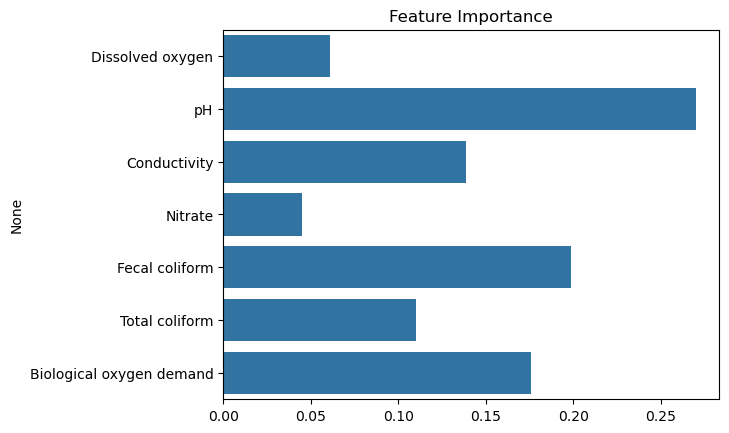

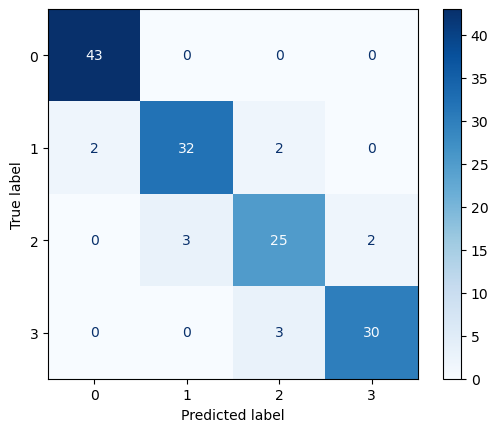

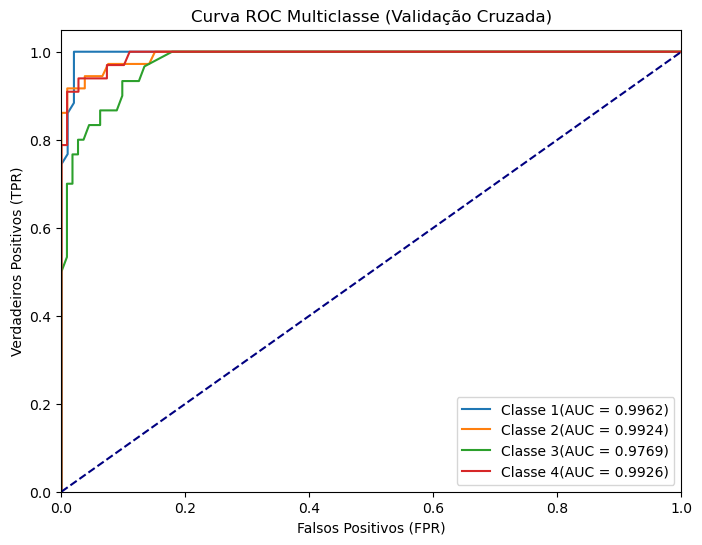

In [58]:
machineLearning('normal', 'Random Forest', 'Arthur', 2, True) # Apenas alterar entre validacao cruzada ou nao